In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://bit.ly/prosper-dataset')

In [3]:
grade_to_number = {'N/A':0,'HR':1,'E':2,'D':3,'C':4,'B':5,'A':6,'AA':7}

In [4]:
 df = df.replace({'CreditGrade': grade_to_number})

In [5]:
 df['ProsperRating (numeric)'].fillna(df['CreditGrade'],inplace=True)
 df['ProsperRating (numeric)'] = pd.to_numeric(df['ProsperRating (numeric)'], errors='coerce')

In [6]:
df = df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1)

In [7]:
dfnew = df.drop(['MemberKey','LoanOriginationQuarter','LoanOriginationDate','LoanKey','FirstRecordedCreditLine','DateCreditPulled','ListingKey','ListingNumber','ListingCreationDate','BorrowerRate','ProsperRating (Alpha)','ProsperScore'],axis=1)

In [8]:
dfnew = dfnew*1
dfnew=dfnew.fillna(dfnew.mean())
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 57 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Term                                113937 non-null  int64  
 1   LoanStatus                          113937 non-null  object 
 2   BorrowerAPR                         113937 non-null  float64
 3   LenderYield                         113937 non-null  float64
 4   EstimatedEffectiveYield             113937 non-null  float64
 5   EstimatedLoss                       113937 non-null  float64
 6   EstimatedReturn                     113937 non-null  float64
 7   ProsperRating (numeric)             113937 non-null  float64
 8   ListingCategory (numeric)           113937 non-null  int64  
 9   BorrowerState                       108422 non-null  object 
 10  Occupation                          110349 non-null  object 
 11  EmploymentStatus          

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [9]:
dfnew.dropna(inplace=True)

In [10]:
dfnew['LoanStatus'] = dfnew['LoanStatus'].apply(lambda x: x.split(" ")[0]).astype(str) 
Status_mapping = {
           'Current': 1,
           'Completed': 1,
           'Past': 0,
            'Defaulted': 0,
            'Chargedoff': 0,
            'FinalPaymentInProgress': 0}

dfnew['LoanStatus'] = dfnew['LoanStatus'].map(Status_mapping)

In [11]:
dfnew = pd.get_dummies(dfnew)

In [12]:
df.to_csv('out.csv')

In [ ]:
X = dfnew.drop('LoanStatus',axis=1)
y = dfnew['LoanStatus']

In [ ]:
X = X.to_numpy()

In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# bf = SelectKBest(score_func=chi2,k=10)
# f = bf.fit(X,y)
# dfs = pd.DataFrame(fit.scores_)
# dfx = pd.DataFrame(X.columns)
# fc = pd.concat([dfs,dfx],axis=1)
# fc.colums = ['Specs','Scores']
# fc

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=0,stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1000.0,random_state=0,max_iter=500)
model=lr.fit(X_train,y_train)
y_pred=model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9909386179627189
Precision: 0.9895778327450598
Recall: 0.9997192273135669


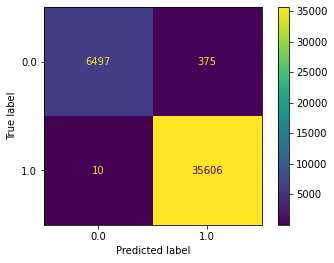

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred, labels=model.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=model.classes_)
disp.plot();